***"Dataset: Tweets.csv"***

**Import Libraries**

In [7]:
# Use ! to run shell commands in Jupyter
!pip install pandas numpy matplotlib seaborn
!pip install nltk textblob vaderSentiment
!pip install tweepy

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from textblob import download_corpora
download_corpora.download_all()


   ---------------------------------------- 0.0/98.8 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.8 kB 660.6 kB/s eta 0:00:01
   ------------------------------------- -- 92.2/98.8 kB 871.5 kB/s eta 0:00:01
   ------------------------------------- -- 92.2/98.8 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 98.8/98.8 kB 568.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/160.1 kB ? eta -:--:--
   -------------------------------------- - 153.6/160.1 kB 3.1 MB/s eta 0:00:01
   -------------------------------------- - 153.6/160.1 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 160.1/160.1 kB 1.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nlt

**Load Dataset**

In [9]:
import pandas as pd

# Load your CSV
df = pd.read_csv('Tweets.csv', encoding='latin-1')

# Keep only relevant columns
df = df[['airline_sentiment', 'text']]
df.columns = ['sentiment', 'text']

# Preview
df.head()


,sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


**Preprocess Text**

In [10]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data if not done already
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # lowercase & handle NaN
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # remove mentions/hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuation/numbers
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_words)

df['clean_text'] = df['text'].apply(clean_text)
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,said
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,negative,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,negative,@VirginAmerica and it's a really big bad thing...,really big bad thing


**Sentiment Analysis**

In [11]:
from textblob import TextBlob
from textblob import download_corpora
download_corpora.download_all()

df['textblob_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['textblob_sentiment'] = df['textblob_polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_da

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['vader_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))


**Visualization**

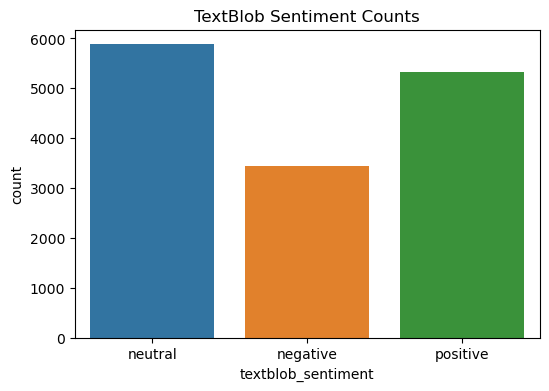

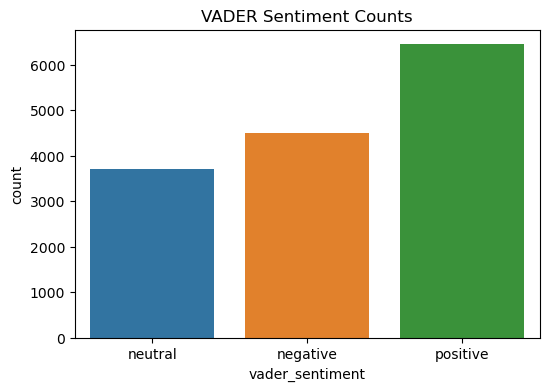

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# TextBlob Sentiment
plt.figure(figsize=(6,4))
sns.countplot(x='textblob_sentiment', data=df)
plt.title('TextBlob Sentiment Counts')
plt.show()

# VADER Sentiment
plt.figure(figsize=(6,4))
sns.countplot(x='vader_sentiment', data=df)
plt.title('VADER Sentiment Counts')
plt.show()
